# Final Project: Trending Youtube Video Statistics 

Marco Erni

## 1. Background

Every action we take online using our electronic devices leaves a footprint that can be measured, saved and used for many different purposes. This evergrowing amount of structured and unstructured data is called "big data" (Buhl et al., 2013). This information can be used to predict our personal interests, political views, sexual orientation and many more individual characteristics, that can be used to influence our daily lifes (Klein et al., 2013). It shouldn't be suprsing, that a lot of the publicly available data is used for the personal gain of many bigger companies. The amount of data and the resulting profit of using is growing at an astonishingly high rate and is predicted to keep increasing (Figure 1) (Columbus, 2018). Considering the parallel growth of social media platforms and the increase of the data gained through it, many companies try to maximize their online presence through the targeted use of data analytics. Being able to predict how popular a post, video or ad will be, can play an essential role in the growth of a company (Jagongo & Kinyua, 2013). Youtube is still the most used online platform to upload videos and therefore provides a multitude of opportunities to analyze data to gain further insight about the behaviour of users (Geipel, 2018). This research project attempts to analyze different predictors regarding the use of Youtube videos and tries to find a way to understand, how certain videos achieve more views then others. 

#### Figure 1

<img src="Big-Data-Market-Size-Revenue-Forecast-Worldwide-From-2011-To-2027-Final.jpg" width="650">

## 2. Variables of Interest

The chosen data consists of 9 different datasets that each represent a different language. They consist of the top trending videos over a period of multiple months. The variables that were chosen to analyze are: 

1. Views
2. Comment count
3. Trending date
4. Language



## 3. Research Questions and Hypothesis
- Does the amount of views stand in relation to the amount of comments and trending date of a video?
- Does language have an influence on the amount of views in relation with the amount of comments and the trending date of a video?
- Does the ability to comment have an influence on the amount of views in relation to the trending date?

***
- **H1**: The amount of views increases with an increase in the amount of comments over time. 
- **H2**: Language has a significant influence on the amount of views and it's relationship with the amount of comments over time. 
- **H3**: The ability to comment on a video correlates negatively with the amount of views over time. 
***

## 4. Data Cleaning

In [547]:
library(tidyverse)
library(dplyr)
library(stringi)
library(readr)
library(boot)
library(lme4)
library(ISLR)
library(MASS)

CA <- read.csv('dataset/CAvideos.csv')
DE <- read.csv('dataset/DEvideos.csv')
FR <- read.csv('dataset/FRvideos.csv')
GB <- read.csv('dataset/GBvideos.csv')
IN <- read.csv('dataset/INvideos.csv')
JP <- read.csv('dataset/JPvideos.csv')
MX <- read.csv('dataset/MXvideos.csv')
RU <- read.csv('dataset/RUvideos.csv')
US <- read.csv('dataset/USvideos.csv')




- Used the library function to load needed assets. Saved each .csv file to a variable representing the language: 

1. CA = Canada
2. DE = Germany
3. FR = France
4. GB = Great Britain
5. IN = India
6. JP = Japan
7. MX = Mexico
8. RU = Russia
9. US = United States

### 4.1 Adjusting Format of Columns

In [548]:
JP$comments_disabled <- as.character(JP$comments_disabled)
JP$ratings_disabled <- as.character(JP$ratings_disabled)
JP$video_error_or_removed <- as.character(JP$video_error_or_removed)
sapply(JP, class)

IN$comments_disabled <- as.character(IN$comments_disabled)
IN$ratings_disabled <- as.character(IN$ratings_disabled)
IN$video_error_or_removed <- as.character(IN$video_error_or_removed)
sapply(IN, class)

MX$comments_disabled <- as.character(MX$comments_disabled)
MX$ratings_disabled <- as.character(MX$ratings_disabled)
MX$video_error_or_removed <- as.character(MX$video_error_or_removed)
sapply(MX, class)

RU$comments_disabled <- as.character(RU$comments_disabled)
RU$ratings_disabled <- as.character(RU$ratings_disabled)
RU$video_error_or_removed <- as.character(RU$video_error_or_removed)
sapply(RU, class)

video_id          trending_date                  title 
           "character"            "character"            "character" 
         channel_title            category_id           publish_time 
           "character"              "integer"            "character" 
                  tags                  views                  likes 
           "character"              "integer"              "integer" 
              dislikes          comment_count         thumbnail_link 
             "integer"              "integer"            "character" 
     comments_disabled       ratings_disabled video_error_or_removed 
           "character"            "character"            "character" 
           description 
           "character"

video_id          trending_date                  title 
           "character"            "character"            "character" 
         channel_title            category_id           publish_time 
           "character"              "integer"            "character" 
                  tags                  views                  likes 
           "character"              "integer"              "integer" 
              dislikes          comment_count         thumbnail_link 
             "integer"              "integer"            "character" 
     comments_disabled       ratings_disabled video_error_or_removed 
           "character"            "character"            "character" 
           description 
           "character"

video_id          trending_date                  title 
           "character"            "character"            "character" 
         channel_title            category_id           publish_time 
           "character"              "integer"            "character" 
                  tags                  views                  likes 
           "character"              "integer"              "integer" 
              dislikes          comment_count         thumbnail_link 
             "integer"              "integer"            "character" 
     comments_disabled       ratings_disabled video_error_or_removed 
           "character"            "character"            "character" 
           description 
           "character"

video_id          trending_date                  title 
           "character"            "character"            "character" 
         channel_title            category_id           publish_time 
           "character"              "integer"            "character" 
                  tags                  views                  likes 
           "character"              "integer"              "integer" 
              dislikes          comment_count         thumbnail_link 
             "integer"              "integer"            "character" 
     comments_disabled       ratings_disabled video_error_or_removed 
           "character"            "character"            "character" 
           description 
           "character"

- Multiple colums were formated in a different data format, which can be checked with the sapply() function. The colums have been adjusted to the character format using the as.character() function.

In [549]:
Data1 <- bind_rows(list(CA=CA, DE=DE, FR=FR, GB=GB, US=US, JP=JP, IN=IN, MX=MX, RU=RU), .id = 'Language')

Data2 <- na.omit(Data1)

Data3 <- subset(Data2, select = -c(category_id, channel_title, title, video_id, tags, thumbnail_link, description, publish_time) )
 
head(Data3)

,Language,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,CA,17.14.11,17158579,787425,43420,125882,False,False,False
2,CA,17.14.11,1014651,127794,1688,13030,False,False,False
3,CA,17.14.11,3191434,146035,5339,8181,False,False,False
4,CA,17.14.11,2095828,132239,1989,17518,False,False,False
5,CA,17.14.11,33523622,1634130,21082,85067,False,False,False
6,CA,17.14.11,1309699,103755,4613,12143,False,False,False


- To clean and tidy the data, all data frames got combined into one, while removing any missing values. Colums that don't play a role in this statistical analysis have been removed. 

In [550]:
Data4 <- mutate_at(Data3, "comments_disabled", str_replace, "FALSE", "False")             
Data5 <- mutate_at(Data4, "comments_disabled", str_replace, "TRUE", "True")
Data6 <- mutate_at(Data5, "ratings_disabled", str_replace, "FALSE", "False")
Data7 <- mutate_at(Data6, "ratings_disabled", str_replace, "TRUE", "True")
Data8 <- mutate_at(Data7, "video_error_or_removed", str_replace, "FALSE", "False")
Data9 <- mutate_at(Data8, "video_error_or_removed", str_replace, "TRUE", "True")

Data9

,Language,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,CA,17.14.11,17158579,787425,43420,125882,False,False,False
2,CA,17.14.11,1014651,127794,1688,13030,False,False,False
3,CA,17.14.11,3191434,146035,5339,8181,False,False,False
4,CA,17.14.11,2095828,132239,1989,17518,False,False,False
5,CA,17.14.11,33523622,1634130,21082,85067,False,False,False
6,CA,17.14.11,1309699,103755,4613,12143,False,False,False
7,CA,17.14.11,2987945,187464,9850,26629,False,False,False
8,CA,17.14.11,748374,57534,2967,15959,False,False,False
9,CA,17.14.11,4477587,292837,4123,36391,False,False,False


- Several columns used a different format for the "False" and "True" answers. This was corrected via a mutate_at() and str_replace() function, to make a comparison possible. 

### 4.2 Remove corrupted or missing data

In [551]:
table(unlist(strsplit(tolower(Data9$Language), " ")))
sapply(Data9, function(x) length(unique(x)))

       
table(unlist(strsplit(tolower(Data9$comments_disabled), " ")))
table(unlist(strsplit(tolower(Data9$ratings_disabled), " ")))
table(unlist(strsplit(tolower(Data9$video_error_or_removed), " ")))
       
Data9_cleaned <- Data9[!(Data9$video_error_or_removed=="True"),]
str(Data9_cleaned)



   ca    de    fr    gb    in    jp    mx    ru    us 
40881 40840 40724 38916 37352 20523 40451 40739 40949 

Language          trending_date                  views 
                     9                    205                 223702 
                 likes               dislikes          comment_count 
                 73039                  16683                  24318 
     comments_disabled       ratings_disabled video_error_or_removed 
                     2                      2                      2


 false   true 
333423   7952 


 false   true 
335467   5908 


 false   true 
341163    212 

'data.frame':	341163 obs. of  9 variables:
 $ Language              : chr  "CA" "CA" "CA" "CA" ...
 $ trending_date         : chr  "17.14.11" "17.14.11" "17.14.11" "17.14.11" ...
 $ views                 : int  17158579 1014651 3191434 2095828 33523622 1309699 2987945 748374 4477587 505161 ...
 $ likes                 : int  787425 127794 146035 132239 1634130 103755 187464 57534 292837 4135 ...
 $ dislikes              : int  43420 1688 5339 1989 21082 4613 9850 2967 4123 976 ...
 $ comment_count         : int  125882 13030 8181 17518 85067 12143 26629 15959 36391 1484 ...
 $ comments_disabled     : chr  "False" "False" "False" "False" ...
 $ ratings_disabled      : chr  "False" "False" "False" "False" ...
 $ video_error_or_removed: chr  "False" "False" "False" "False" ...


- The data seems to be pretty equally distributed across the 9 languages, with an exception for JP, which seems to be a bit underrepresented at only 20'523 videos. The data has been taken over 205 different days.
- 212 videos showed an error or got removed from Youtube and got therefore also removed from the data frame.

### 4.3 Adjusted Date Format

In [552]:
Data10 <- Data9

Data10$trending_date <- as.Date(Data10$trending_date,
                        format = "%y.%d.%m")
str(Data10)

Data10


'data.frame':	341375 obs. of  9 variables:
 $ Language              : chr  "CA" "CA" "CA" "CA" ...
 $ trending_date         : Date, format: "2017-11-14" "2017-11-14" ...
 $ views                 : int  17158579 1014651 3191434 2095828 33523622 1309699 2987945 748374 4477587 505161 ...
 $ likes                 : int  787425 127794 146035 132239 1634130 103755 187464 57534 292837 4135 ...
 $ dislikes              : int  43420 1688 5339 1989 21082 4613 9850 2967 4123 976 ...
 $ comment_count         : int  125882 13030 8181 17518 85067 12143 26629 15959 36391 1484 ...
 $ comments_disabled     : chr  "False" "False" "False" "False" ...
 $ ratings_disabled      : chr  "False" "False" "False" "False" ...
 $ video_error_or_removed: chr  "False" "False" "False" "False" ...


,Language,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
,<chr>,<date>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,CA,2017-11-14,17158579,787425,43420,125882,False,False,False
2,CA,2017-11-14,1014651,127794,1688,13030,False,False,False
3,CA,2017-11-14,3191434,146035,5339,8181,False,False,False
4,CA,2017-11-14,2095828,132239,1989,17518,False,False,False
5,CA,2017-11-14,33523622,1634130,21082,85067,False,False,False
6,CA,2017-11-14,1309699,103755,4613,12143,False,False,False
7,CA,2017-11-14,2987945,187464,9850,26629,False,False,False
8,CA,2017-11-14,748374,57534,2967,15959,False,False,False
9,CA,2017-11-14,4477587,292837,4123,36391,False,False,False


- To be able to make a comprehensible graphical overview of the data to correctly display the change over time, the date had to be adjusted to the correct format. 

## 5. Statistical Analysis

### 5.1 Visualisation of Data

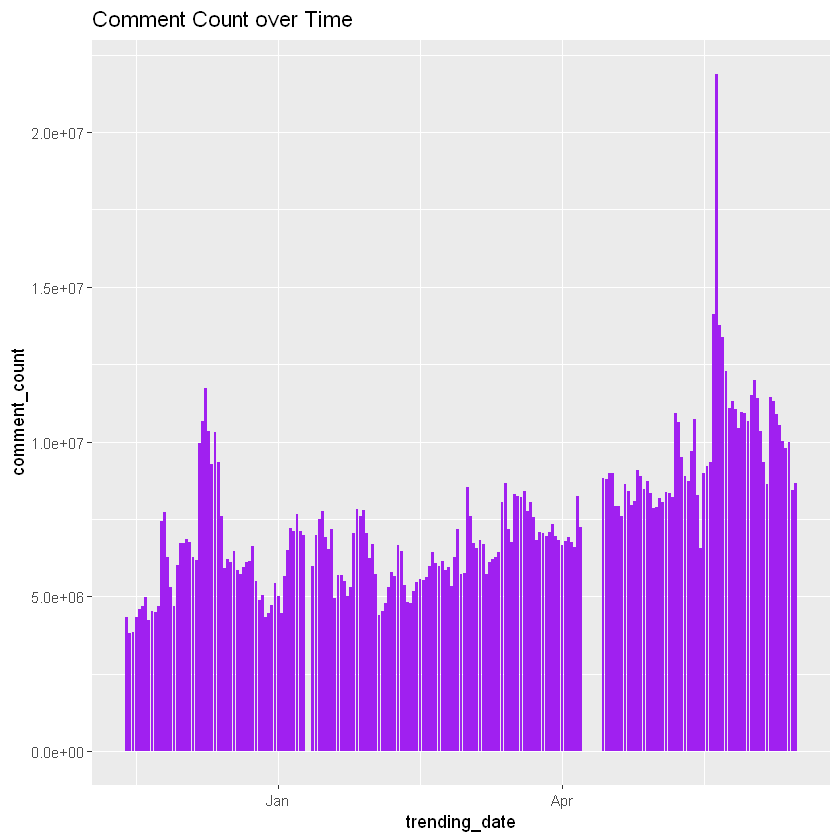

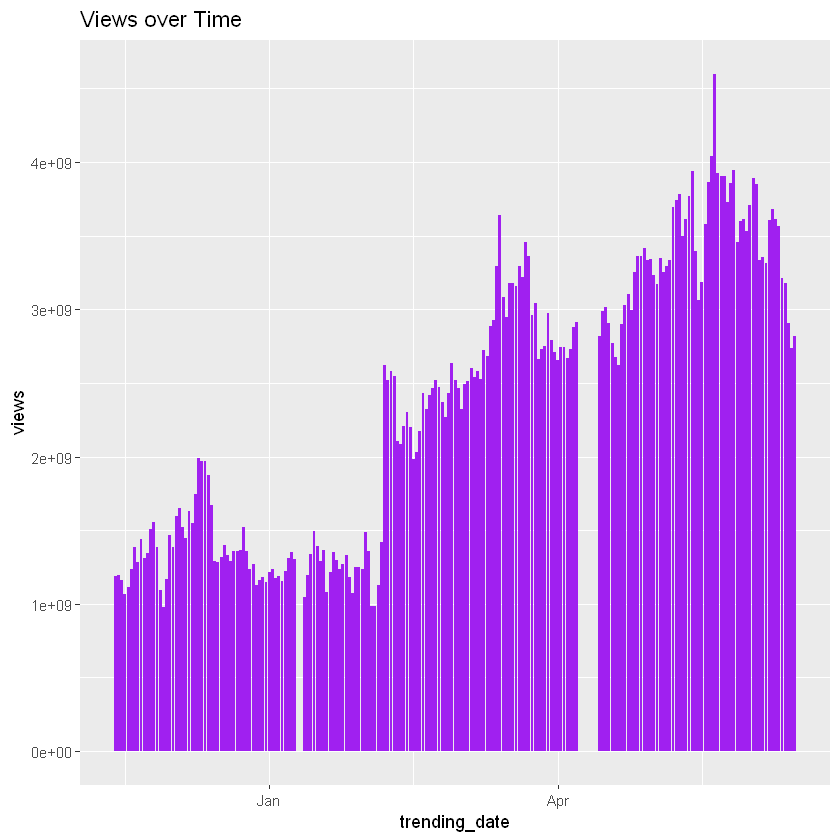

In [553]:
ggplot(data = Data10, aes(x = trending_date, y = comment_count)) +
      geom_bar(stat = "identity", fill = "purple") + ggtitle("Comment Count over Time")

ggplot(data = Data10, aes(x = trending_date, y = views)) +
      geom_bar(stat = "identity", fill = "purple") + ggtitle("Views over Time") 


- Just by looking at the barplot, there seems to be an indication that the amount of comments and views seem to be increasing over time. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 205 rows containing missing values (geom_segment)."


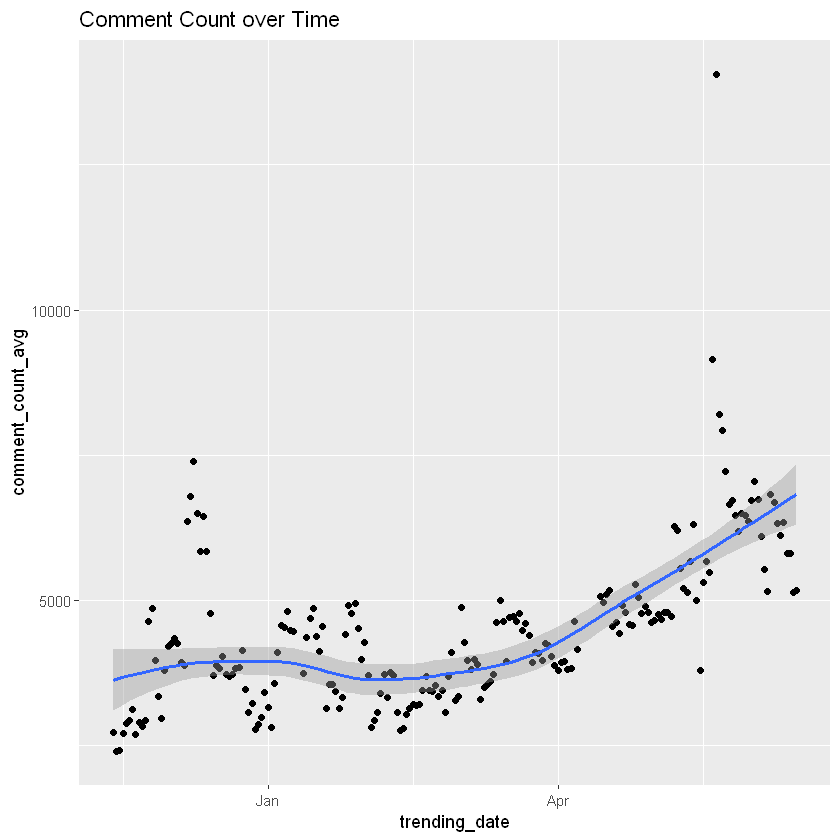

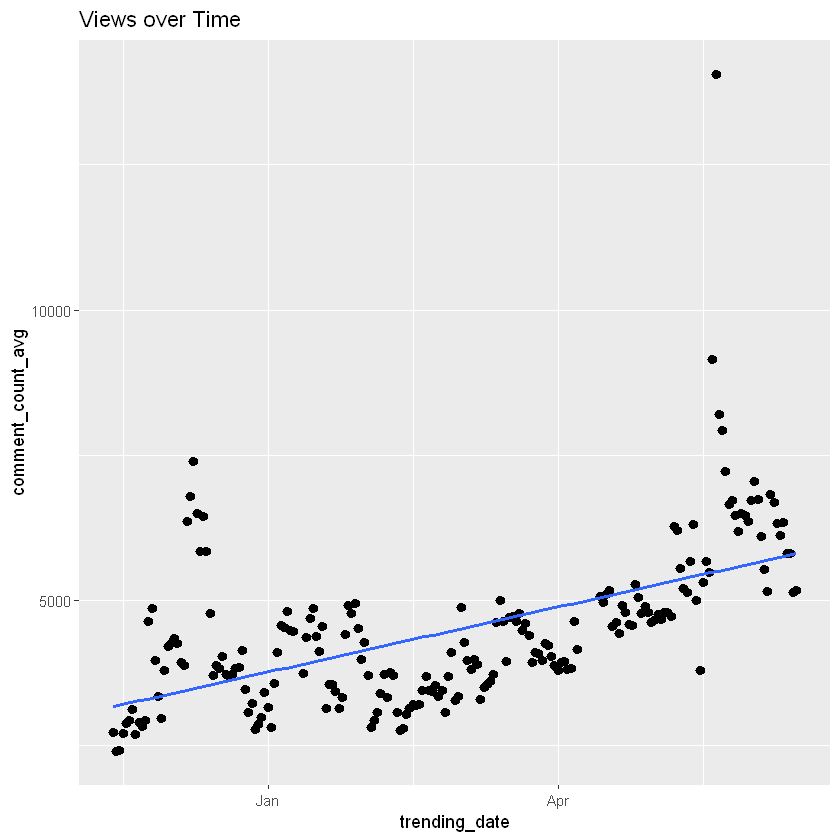

In [554]:
Data10_avg <- Data10 %>% 
      group_by(trending_date) %>%
      summarize(comment_count_avg=mean(comment_count))

Data10_avg %>%
        ggplot(aes(x = trending_date, y = comment_count_avg, color_Language)) + 
        geom_point() + geom_smooth() + ggtitle("Comment Count over Time")
Data10_avg %>%
    ggplot(aes(trending_date, comment_count_avg)) + stat_summary(fun = mean) + geom_smooth(method='lm', se=F) + ggtitle("Views over Time")

- Based on these plots, a better estimation about the distribution of the data can be made. While a linear regression might not be perfect, regarding the trend it should still be an acceptable option for the data. 

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1762 rows containing missing values (geom_segment)."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     109     541    4479    2199 1626501 

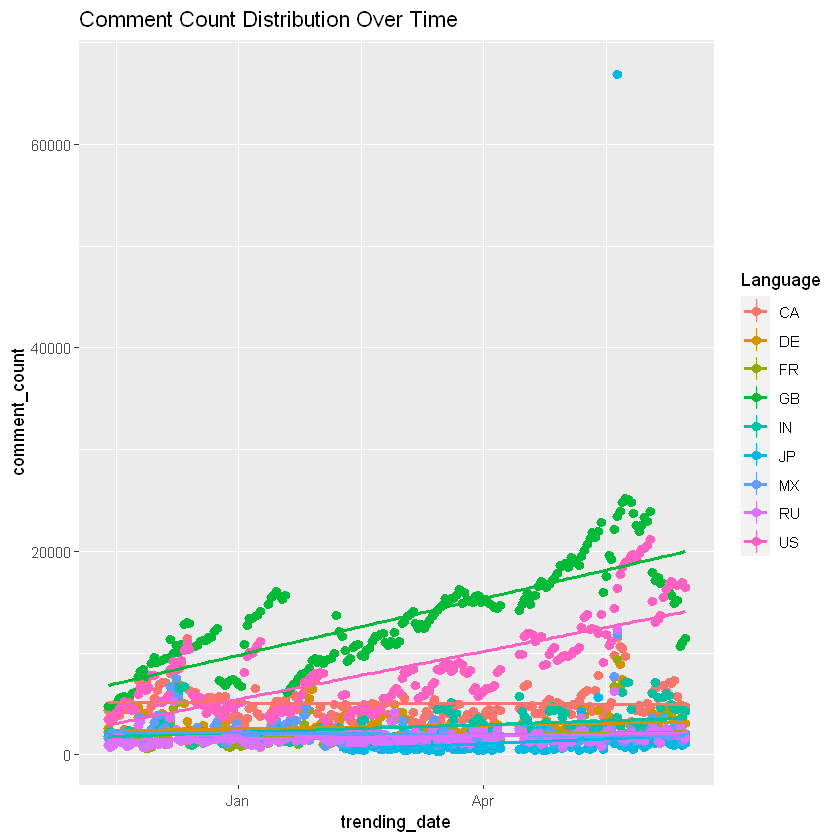

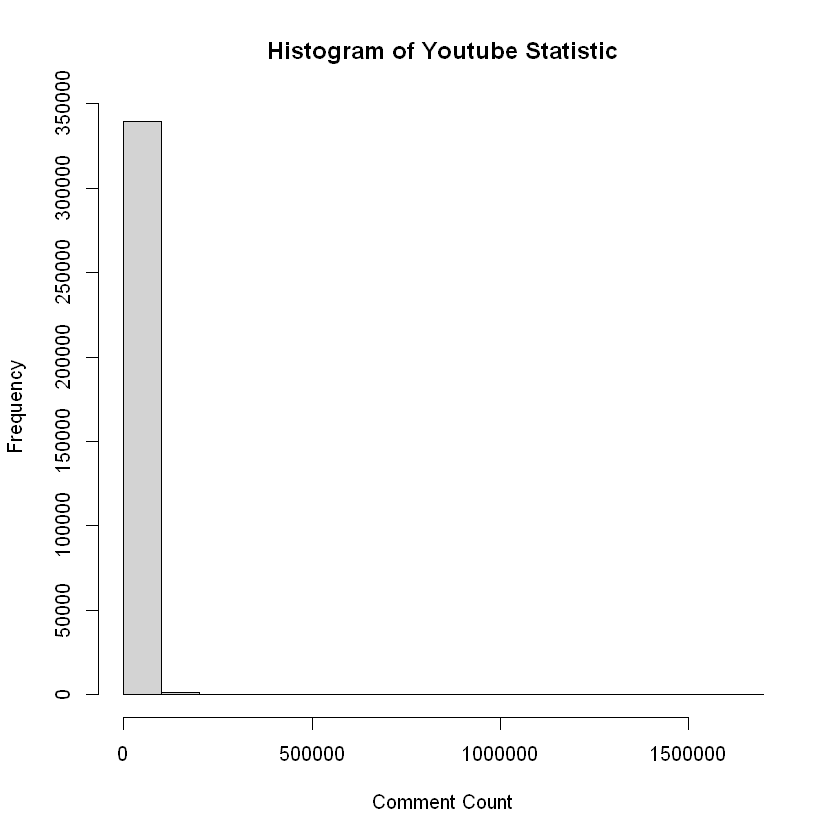

In [555]:
Data10 %>%
        ggplot(aes(x = trending_date, y = comment_count, color = Language)) +
        stat_summary(fun = mean) + geom_smooth(method='lm', se=F) + ggtitle("Comment Count Distribution Over Time")

summary(Data10$comment_count)

hist(Data10$comment_count, main = "Histogram of Youtube Statistic", xlab="Comment Count")


- Looking at the first plot, most languages with the exception of GB and US seem to have similar values. A better visualisation method seems to be required to create a better overview. 
- The histogram shows, that a small part of the data seems to outperform most videos by a lot. Looking at the data summary, the maximum value is extremely far away from the Mean. Considering the nature of the data, These videos will not be treated as outliers and will remain in the dataset. In future studies a more segmented approach regarding the popularity of the different videos should be probably be taken. 

`geom_smooth()` using formula 'y ~ x'



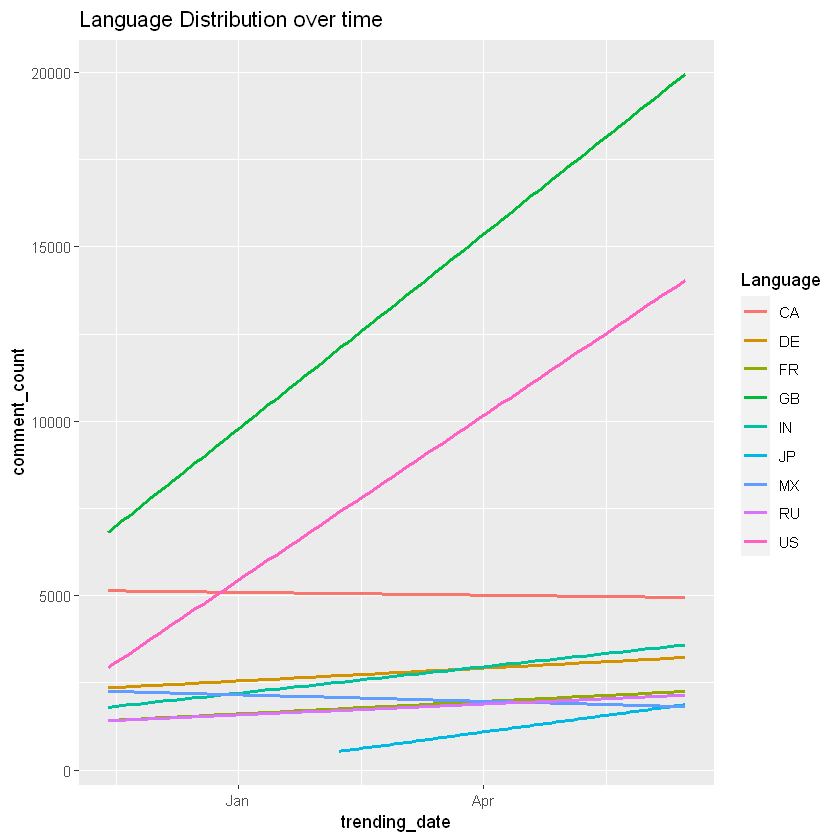

In [556]:
Data10 %>%
        ggplot(aes(x = trending_date, y = comment_count, color = Language)) +
        geom_smooth(method='lm', se=F) + ggtitle("Language Distribution over time")


- US and GB seem to have the steepest slope by far. CA and MX seem to decrease slightly, while the rest only increases slightly. 

### 5.2 Bootstrap

In [557]:
set.seed(1)
boot.fn <- function(Data10, index) {
    mu <- mean(Data10[index])
    return (mu)
}
boot(Data10$views, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Data10$views, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original    bias    std. error
t1*  1417865 -28.65178    12631.94

In [558]:
Data10_CI <- c(1417865 - 12631.94, 1417865 + 12631.94 )
Data10_CI

summary(Data10$views)

[1] 1405233 1430497

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      117     46850    190140   1417865    708108 424538912 

- So after bootstrapping the data we have a 95% possibility that the mean is between 1'405'233 and 1'430'496 views per video. 

### 5.3 Correlation Tests

#### 5.3.1 Views and Comment Count

In [559]:
#Correlation test views and comment count
cor.test(~views + comment_count, data = Data10)

cor.test(~views + comment_count, data = Data10, subset=(Language=="CA"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="DE"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="FR"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="GB"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="IN"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="JP"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="MX"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="RU"))
cor.test(~views + comment_count, data = Data10, subset=(Language=="US"))



	Pearson's product-moment correlation

data:  views and comment_count
t = 344.24, df = 341373, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5051251 0.5101054
sample estimates:
      cor 
0.5076195 



	Pearson's product-moment correlation

data:  views and comment_count
t = 194.41, df = 40879, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6880356 0.6981098
sample estimates:
      cor 
0.6931066 



	Pearson's product-moment correlation

data:  views and comment_count
t = 201.18, df = 40838, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7006113 0.7103539
sample estimates:
     cor 
0.705516 



	Pearson's product-moment correlation

data:  views and comment_count
t = 202.4, df = 40722, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7032853 0.7129692
sample estimates:
      cor 
0.7081606 



	Pearson's product-moment correlation

data:  views and comment_count
t = 104.15, df = 38914, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4590934 0.4746329
sample estimates:
      cor 
0.4668992 



	Pearson's product-moment correlation

data:  views and comment_count
t = 176.42, df = 37350, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6686251 0.6796890
sample estimates:
      cor 
0.6741949 



	Pearson's product-moment correlation

data:  views and comment_count
t = 225.29, df = 20521, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8398658 0.8477450
sample estimates:
      cor 
0.8438509 



	Pearson's product-moment correlation

data:  views and comment_count
t = 185.41, df = 40449, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6725089 0.6830452
sample estimates:
      cor 
0.6778118 



	Pearson's product-moment correlation

data:  views and comment_count
t = 217.01, df = 40737, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7277044 0.7367128
sample estimates:
      cor 
0.7322406 



	Pearson's product-moment correlation

data:  views and comment_count
t = 158.91, df = 40947, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6115942 0.6235766
sample estimates:
      cor 
0.6176213 


- Overall=0.5076195 
- CA=0.6931066 
- DE=0.705516 
- FR=0.7081606 
- GB=0.4668992 
- IN=0.6741949
- JP=0.8438509 
- MX=0.6778118 
- RU=0.7322406 
- US=0.6176213

- Correlation test for the relation between views and comment count. The amount of comments seems to correlate significantly between 0.466 (GB) and 0.843 (US) with the amount of views on a video. 

In [560]:
Data11 <- Data10

Data11$trending_date <- as.numeric(Data11$trending_date)

cor(Data11[c(2, 3, 6)])

,trending_date,views,comment_count
trending_date,1.00000000,0.06415547,0.02979432
views,0.06415547,1.00000000,0.50761949
comment_count,0.02979432,0.50761949,1.00000000


- To be able to calculate a correlation matrix, the format of trending_date has to be changed to numeric. 

#### 5.3.2 Comment Count and Trending Date

In [561]:
#Correlation test comment count and date
cor.test(~comment_count + trending_date, data = Data11)

cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="CA"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="DE"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="FR"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="GB"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="IN"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="JP"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="MX"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="RU"))
cor.test(~comment_count + trending_date, data = Data11, subset=(Language=="US"))



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 17.416, df = 341373, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02644243 0.03314555
sample estimates:
       cor 
0.02979432 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = -0.52293, df = 40879, p-value = 0.601
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.012279773  0.007107502
sample estimates:
         cor 
-0.002586379 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 2.944, df = 40838, p-value = 0.003242
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004868706 0.024261724
sample estimates:
       cor 
0.01456658 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 3.5024, df = 40722, p-value = 0.0004616
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.007642359 0.027061250
sample estimates:
       cor 
0.01735344 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 14.765, df = 38914, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06475152 0.08451168
sample estimates:
       cor 
0.07463893 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 6.8523, df = 37350, p-value = 7.378e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02530178 0.04555892
sample estimates:
       cor 
0.03543399 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 3.8138, df = 20521, p-value = 0.0001373
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01293677 0.04028030
sample estimates:
       cor 
0.02661351 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = -1.8278, df = 40449, p-value = 0.06759
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0188309558  0.0006576131
sample estimates:
         cor 
-0.009087534 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 3.8104, df = 40737, p-value = 0.0001389
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.009166574 0.028580819
sample estimates:
       cor 
0.01887548 



	Pearson's product-moment correlation

data:  comment_count and trending_date
t = 17.67, df = 40947, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07736905 0.09659378
sample estimates:
       cor 
0.08698951 


- Overall=0.02979432 
- CA=-0.002586379 (p =0.601) 
- DE=0.01456658 
- FR=0.01735344 
- GB=0.07463893 
- IN=0.03543399 
- JP=0.02661351
- MX=-0.009087534 (p = 0.06759)
- RU=0.01887548 
- US=0.08698951 


- The correlation seems be rather low. The highest correlation can be observed in GB/ US and a negative correlation in MX, but the result is not signficant. 

#### 5.3.3 Views and Trending Date

In [562]:
#Correlation test views and date
cor.test(~views + trending_date, data = Data11)

cor.test(~views + trending_date, data = Data11, subset=(Language=="CA"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="DE"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="FR"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="GB"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="IN"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="JP"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="MX"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="RU"))
cor.test(~views + trending_date, data = Data11, subset=(Language=="US"))


	Pearson's product-moment correlation

data:  views and trending_date
t = 37.562, df = 341373, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06081402 0.06749548
sample estimates:
       cor 
0.06415547 



	Pearson's product-moment correlation

data:  views and trending_date
t = 1.4087, df = 40879, p-value = 0.1589
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.002726577  0.016659886
sample estimates:
        cor 
0.006967309 



	Pearson's product-moment correlation

data:  views and trending_date
t = 6.8592, df = 40838, p-value = 7.024e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02423206 0.04360687
sample estimates:
       cor 
0.03392265 



	Pearson's product-moment correlation

data:  views and trending_date
t = 7.4167, df = 40722, p-value = 1.224e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02702585 0.04642438
sample estimates:
       cor 
0.03672858 



	Pearson's product-moment correlation

data:  views and trending_date
t = 31.977, df = 38914, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1503167 0.1696788
sample estimates:
      cor 
0.1600131 



	Pearson's product-moment correlation

data:  views and trending_date
t = 12.555, df = 37350, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05472088 0.07491826
sample estimates:
       cor 
0.06482621 



	Pearson's product-moment correlation

data:  views and trending_date
t = 4.6749, df = 20521, p-value = 2.959e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01894400 0.04627781
sample estimates:
     cor 
0.032617 



	Pearson's product-moment correlation

data:  views and trending_date
t = 1.9975, df = 40449, p-value = 0.04578
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0001863074 0.0196745635
sample estimates:
        cor 
0.009931378 



	Pearson's product-moment correlation

data:  views and trending_date
t = 8.1795, df = 40737, p-value = 2.932e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03079415 0.05018347
sample estimates:
       cor 
0.04049262 



	Pearson's product-moment correlation

data:  views and trending_date
t = 36.157, df = 40947, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1664949 0.1852669
sample estimates:
      cor 
0.1758969 


- Overall=0.06415547                
- CA=0.006967309 (p-value = 0.1589) 
- DE=0.03392265                     
- FR=0.03672858                    
- GB=0.1600131                      
- IN=0.06482621                     
- JP=0.032617                       
- MX=0.009931378                  
- RU=0.04049262  
- US=0.1758969 

- The correlation seems to be strongest in GB/US and weakest in CA. CA is the only result that is not significant. 

### 5.4 Multiple Linear Regression 

In [563]:
#Multiple Linear Regression for views with date + comment count
ml1 <- lm(views~trending_date+comment_count, data = Data11)
summary(ml1)


Call:
lm(formula = views ~ trending_date + comment_count, data = Data11)

Residuals:
       Min         1Q     Median         3Q        Max 
-191260940    -938670    -572296    -199848  409128210 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.029e+08  3.111e+06  -33.07   <2e-16 ***
trending_date  5.893e+03  1.769e+02   33.32   <2e-16 ***
comment_count  1.452e+02  4.224e-01  343.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6368000 on 341372 degrees of freedom
Multiple R-squared:  0.2601,	Adjusted R-squared:  0.2601 
F-statistic: 6e+04 on 2 and 341372 DF,  p-value: < 2.2e-16


- The fit of the model is low (R-squared = 0.2601). Date and the amount of comments seem to able to predict the amount of views a video has signficantly. **H1** is therefore confirmed. 

In [564]:
ml2 <- lm(views~trending_date+comment_count+Language, data = Data11)
summary(ml2)


Call:
lm(formula = views ~ trending_date + comment_count + Language, 
    data = Data11)

Residuals:
       Min         1Q     Median         3Q        Max 
-183635177    -718482    -217499     260673  406383820 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.226e+08  3.096e+06 -39.598  < 2e-16 ***
trending_date  6.996e+03  1.760e+02  39.744  < 2e-16 ***
comment_count  1.384e+02  4.188e-01 330.502  < 2e-16 ***
LanguageDE    -2.299e+05  4.370e+04  -5.262 1.43e-07 ***
LanguageFR    -2.807e+05  4.374e+04  -6.417 1.39e-10 ***
LanguageGB     3.679e+06  4.436e+04  82.923  < 2e-16 ***
LanguageIN     2.471e+05  4.471e+04   5.526 3.28e-08 ***
LanguageJP    -6.519e+05  5.399e+04 -12.075  < 2e-16 ***
LanguageMX    -3.820e+05  4.381e+04  -8.719  < 2e-16 ***
LanguageRU    -4.512e+05  4.374e+04 -10.316  < 2e-16 ***
LanguageUS     7.423e+05  4.369e+04  16.993  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard e

- Adding the Language as a predictor slightly increases the explained variance (R-squared 0.2884). The influence of the Language predictor has a significant influence on the amount of views and it's relation with the amount of comments over time. While the fit of the model is rather low, **H2** can be confirmed with the model. 

### 5.5 No Comment Testing

In [565]:
#Dataset with disabled comments
Data11_1 <- Data10[!(Data10$comments_disabled=="False"),]
Data11_1$trending_date <- as.Date(Data11_1$trending_date,
                          format = "%y.%d.%m")

#Dataset with disabled comments (numeric)
Data11_1_numeric <- Data11[!(Data11$comments_disabled=="False"),]

#Regular Dataset for comparison
Data11_2 <- Data10
Data11_2$trending_date <- as.Date(Data11_2$trending_date,
                          format = "%y.%d.%m")

#Regular Dataset for comparison(numeric)
Data11_2_numeric <- Data11



- To test the data where commenting on the videos is disabled, 2 new dataframes are created with the date in as.Date format. Just as before, this makes the visual comparison easier.

#### 5.5.1 Views and Trending Date

In [566]:
#Correlation test with disabled comments dataset
cor.test(~views + trending_date, data = Data11_1_numeric)

cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="CA"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="DE"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="FR"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="GB"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="IN"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="JP"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="MX"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="RU"))
cor.test(~views + trending_date, data = Data11_1_numeric, subset=(Language=="US"))


	Pearson's product-moment correlation

data:  views and trending_date
t = 0.99214, df = 7950, p-value = 0.3212
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01085581  0.03309817
sample estimates:
       cor 
0.01112655 



	Pearson's product-moment correlation

data:  views and trending_date
t = -0.36158, df = 581, p-value = 0.7178
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09608623  0.06628523
sample estimates:
        cor 
-0.01499939 



	Pearson's product-moment correlation

data:  views and trending_date
t = 1.1615, df = 1042, p-value = 0.2457
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02476816  0.09641971
sample estimates:
       cor 
0.03595797 



	Pearson's product-moment correlation

data:  views and trending_date
t = 0.091324, df = 887, p-value = 0.9273
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06269758  0.06880374
sample estimates:
        cor 
0.003066335 



	Pearson's product-moment correlation

data:  views and trending_date
t = 0.52603, df = 681, p-value = 0.599
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05494976  0.09502959
sample estimates:
       cor 
0.02015329 



	Pearson's product-moment correlation

data:  views and trending_date
t = 7.1081, df = 1202, p-value = 2.013e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1460050 0.2544521
sample estimates:
      cor 
0.2008438 



	Pearson's product-moment correlation

data:  views and trending_date
t = 0.23017, df = 1412, p-value = 0.818
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04601992  0.05823690
sample estimates:
        cor 
0.006125136 



	Pearson's product-moment correlation

data:  views and trending_date
t = 0.33426, df = 438, p-value = 0.7383
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07763045  0.10929034
sample estimates:
       cor 
0.01596947 



	Pearson's product-moment correlation

data:  views and trending_date
t = 0.51609, df = 1060, p-value = 0.6059
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04434832  0.07593259
sample estimates:
       cor 
0.01584948 



	Pearson's product-moment correlation

data:  views and trending_date
t = 3.6728, df = 631, p-value = 0.0002602
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06750726 0.22012147
sample estimates:
      cor 
0.1446747 


- Correlation test for views and trending date, with videos where comments are disabled. 

- Overall=0.06415547                -> 0.01112655 (p-value =0.3212)
- CA=0.006967309 (p-value = 0.1589) -> -0.01499939 (p-value = 0.7178)
- DE=0.03392265                     -> 0.03595797 (p-value = 0.2457)
- FR=0.03672858                     -> 0.003066335 (p-value = 0.9273)
- GB=0.1600131                      -> 0.02015329 (p-value = 0.599)
- IN=0.06482621                     -> 0.2008438 
- JP=0.032617                       -> 0.006125136  (p-value = 0.818)
- MX=0.009931378                    -> 0.01596947 (p-value = 0.7383)
- RU=0.04049262                     -> 0.01584948 (p-value = 0.6059)
- US=0.17589 -> 0.1446747 

- Re-testing the correlation between views and trending date with the data set that only includes videos where comments are disabled. The correlation seems to have dropped overall. The amount of views has increased for IN videos and only decreased slightly for US. With the exception of IN and US all results are not significant and should be only be used carefully. **H3** could therefore not be confirmed.  

### 5.5.2 Multiple Linear Regression

In [567]:
ml3 <- lm(views~trending_date+Language, data = Data11_1)
summary(ml3)


Call:
lm(formula = views ~ trending_date + Language, data = Data11_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-5168817  -533591  -244739   -24063 57254625 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.388e+07  1.650e+07  -2.659 0.007862 ** 
trending_date  2.566e+03  9.381e+02   2.736 0.006236 ** 
LanguageDE    -6.792e+05  2.417e+05  -2.810 0.004974 ** 
LanguageFR    -8.783e+05  2.489e+05  -3.528 0.000421 ***
LanguageGB     3.778e+06  2.634e+05  14.346  < 2e-16 ***
LanguageIN    -7.572e+05  2.364e+05  -3.203 0.001364 ** 
LanguageJP    -1.190e+06  2.320e+05  -5.130 2.96e-07 ***
LanguageMX    -7.376e+05  2.950e+05  -2.501 0.012412 *  
LanguageRU    -1.073e+06  2.407e+05  -4.455 8.51e-06 ***
LanguageUS     1.271e+06  2.682e+05   4.737 2.20e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4670000 on 7942 degrees of freedom
Multiple R-squared:  0.08191,	Adjusted R-squared:  0.08

- The model fit and significance levels decreased drastically. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 205 rows containing missing values (geom_segment)."


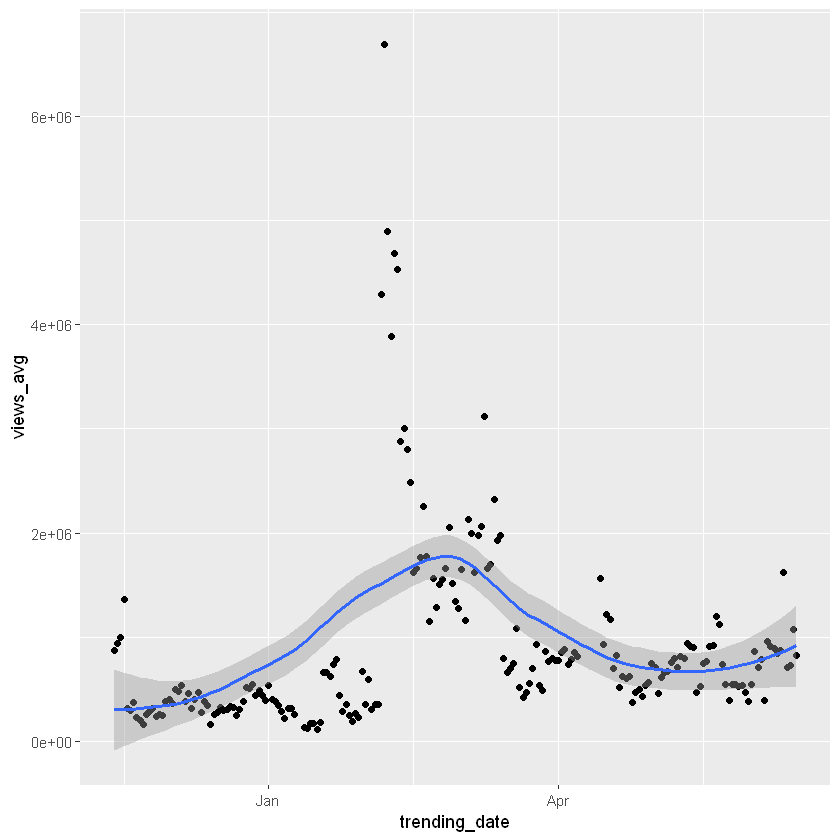

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



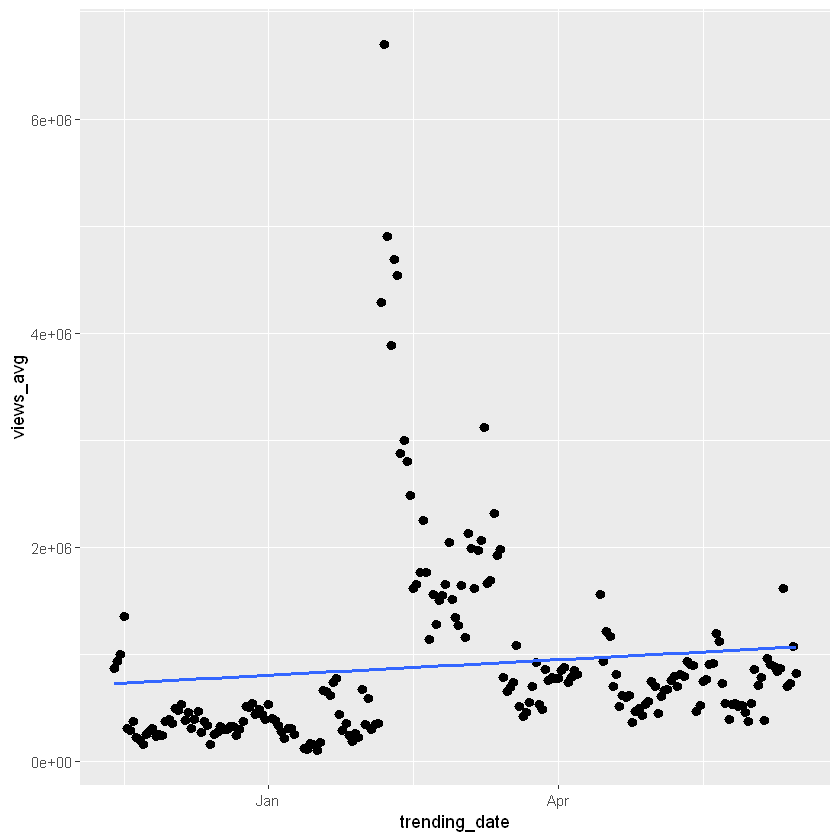

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 205 rows containing missing values (geom_segment)."


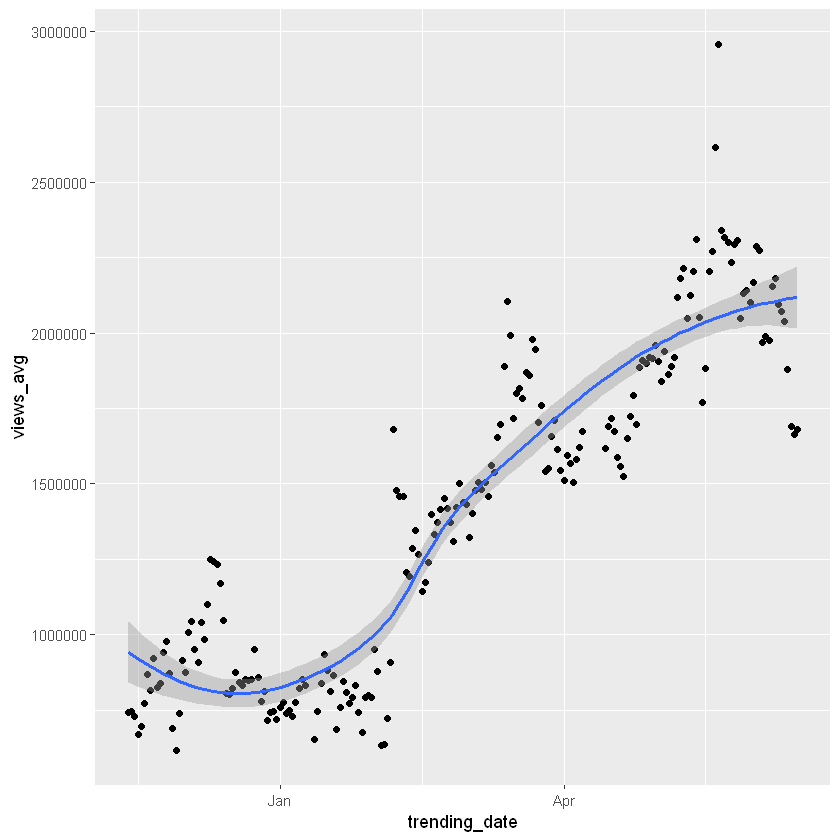

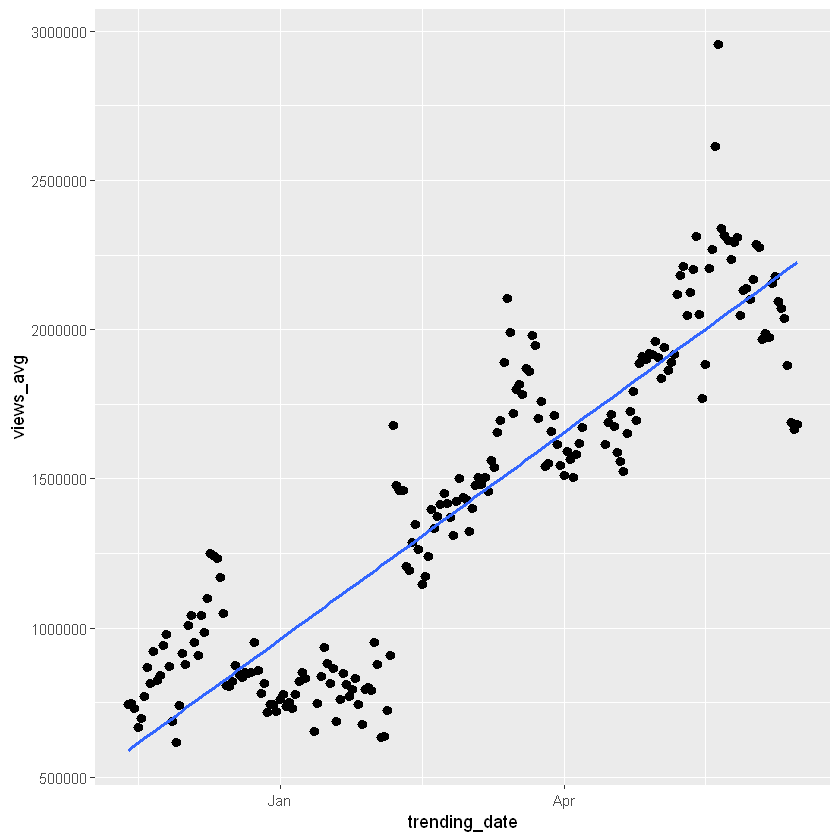

In [568]:
#Dataset with disabled comments
Data11_avg <- Data11_1 %>% 
      group_by(trending_date) %>%
      summarize(views_avg=mean(views))
Data11_avg %>%
        ggplot(aes(x = trending_date, y = views_avg, color_Language)) + 
        geom_point() + geom_smooth()
Data11_avg %>%
    ggplot(aes(trending_date, views_avg)) + stat_summary(fun = mean) + geom_smooth(method='lm', se=F)

#Regular Dataset
Data11_avg <- Data11_2 %>% 
      group_by(trending_date) %>%
      summarize(views_avg=mean(views))
Data11_avg %>%
        ggplot(aes(x = trending_date, y = views_avg, color_Language)) + 
        geom_point() + geom_smooth()
Data11_avg %>%
    ggplot(aes(trending_date, views_avg)) + stat_summary(fun = mean) + geom_smooth(method='lm', se=F)


- The visualisation seems to support the results. Comparing the distribution of the average views in relation to the date, seems to completely change the distribution. So if comments are disabled, does that mean the "success" the video has is automatically limited or simply very unpredictable?

### 5.6 Mixed Modeling

In [569]:
mixed_ml0 <- lmer(views ~ 1 + (1|comment_count), data=Data11)
summary(mixed_ml0)

mixed_ml1 <- lmer(views ~ 1 + (1|comment_count) + trending_date, data=Data11)
summary(mixed_ml1)

mixed_ml2 <- lmer(views ~ 1 + (1|comment_count) + trending_date + Language, data=Data11)
summary(mixed_ml2)

Linear mixed model fit by REML ['lmerMod']
Formula: views ~ 1 + (1 | comment_count)
   Data: Data11

REML criterion at convergence: 10998781

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-35.676  -0.107  -0.029   0.019  49.831 

Random effects:
 Groups        Name        Variance  Std.Dev.
 comment_count (Intercept) 5.183e+14 22765226
 Residual                  3.723e+12  1929423
Number of obs: 341375, groups:  comment_count, 24318

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8869375     146259   60.64

Linear mixed model fit by REML ['lmerMod']
Formula: views ~ 1 + (1 | comment_count) + trending_date
   Data: Data11

REML criterion at convergence: 10998227

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-35.710  -0.118  -0.031   0.036  49.899 

Random effects:
 Groups        Name        Variance  Std.Dev.
 comment_count (Intercept) 5.179e+14 22757997
 Residual                  3.716e+12  1927820
Number of obs: 341375, groups:  comment_count, 24318

Fixed effects:
                Estimate Std. Error t value
(Intercept)   -1.458e+07  1.016e+06  -14.35
trending_date  1.332e+03  5.712e+01   23.32

Correlation of Fixed Effects:
            (Intr)
trending_dt -0.990

Linear mixed model fit by REML ['lmerMod']
Formula: views ~ 1 + (1 | comment_count) + trending_date + Language
   Data: Data11

REML criterion at convergence: 10988914

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-36.011  -0.127  -0.014   0.082  50.231 

Random effects:
 Groups        Name        Variance  Std.Dev.
 comment_count (Intercept) 5.119e+14 22624190
 Residual                  3.614e+12  1901096
Number of obs: 341375, groups:  comment_count, 24318

Fixed effects:
                Estimate Std. Error t value
(Intercept)   -2.551e+07  1.026e+06 -24.862
trending_date  1.931e+03  5.768e+01  33.469
LanguageDE    -4.186e+04  1.379e+04  -3.036
LanguageFR    -3.983e+04  1.392e+04  -2.863
LanguageGB     1.039e+06  1.464e+04  70.989
LanguageIN     2.795e+05  1.423e+04  19.643
LanguageJP    -1.637e+05  1.731e+04  -9.457
LanguageMX    -1.080e+05  1.407e+04  -7.677
LanguageRU    -1.758e+05  1.393e+04 -12.626
LanguageUS     2.590e+05  1.401e+04  18.483

Correlation of Fixed 

In [570]:
anova(mixed_ml0, mixed_ml1, mixed_ml2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_ml0,3,10998812,10998844,-5499403,10998806,NA,NA,NA
mixed_ml1,4,10998271,10998314,-5499131,10998263,543.3616,1,3.50046e-120
mixed_ml2,12,10989139,10989267,-5494557,10989115,9148.3178,8,0.00000e+00


- The AIC shows, that the addition of the trending date (mixed_ml1) as well as the addition of language (mixed_ml2) decreases the accuracy of the model.

In [571]:
Data11_anova <- aov(views ~ comment_count + trending_date + Language, data = Data11)
summary(Data11_anova)

Data11_anova_1 <- aov(views ~ comment_count * Language * trending_date, data = Data11)
summary(Data11_anova_1)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
comment_count      1 4.821e+18 4.821e+18  123610 <2e-16 ***
trending_date      1 4.502e+16 4.502e+16    1154 <2e-16 ***
Language           8 5.296e+17 6.620e+16    1697 <2e-16 ***
Residuals     341364 1.331e+19 3.900e+13                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                                         Df    Sum Sq   Mean Sq  F value Pr(>F)
comment_count                             1 4.821e+18 4.821e+18 132683.7 <2e-16
Language                                  8 5.130e+17 6.412e+16   1764.9 <2e-16
trending_date                             1 6.160e+16 6.160e+16   1695.5 <2e-16
comment_count:Language                    8 2.829e+17 3.536e+16    973.3 <2e-16
comment_count:trending_date               1 2.824e+17 2.824e+17   7772.2 <2e-16
Language:trending_date                    8 1.441e+17 1.802e+16    495.9 <2e-16
comment_count:Language:trending_date      8 2.020e+17 2.525e+16    694.8 <2e-16
Residuals                            341339 1.240e+19 3.633e+13                
                                        
comment_count                        ***
Language                             ***
trending_date                        ***
comment_count:Language               ***
comment_count:trending_date          ***
Language:trending_date            

- The anova shows that all predictors have a signficant interaction with each other. 

## 6. Training Model to Predict Views

### 6.1 Simple Model

In [572]:
model <- lm(views ~ comment_count, data = Data11)
model


Call:
lm(formula = views ~ comment_count, data = Data11)

Coefficients:
  (Intercept)  comment_count  
     765788.4          145.6  


In [573]:
summary(Data11$comment_count)

new.comment_count <- data.frame(comment_count = c(0, 1000, 10000, 100000, 1000000))

predict(model, newdata = new.comment_count)

predict(model, newdata = new.comment_count, interval = "confidence")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     109     541    4479    2199 1626501 

1           2           3           4           5 
   765788.4    911360.1   2221505.1  15322955.2 146337456.8

,fit,lwr,upr
1,765788.4,744072.6,787504.2
2,911360.1,889770.5,932949.6
3,2221505.1,2199625.2,2243384.9
4,15322955.2,15240943.9,15404966.6
5,146337456.8,145512053.7,147162860.0


- This model gives us an approximation of the amount views a video will generate based on the amount of comments. The data is based on the datset itself with a random set of comment counts. 

### 6.2 Training Data Set Model

In [574]:
#Creating new data frame with a numeric format for views
Data12 <- Data11
Data13 <- Data12
Data13$views <- as.numeric(Data12$views)


views_med <- rep(0, length(Data13$views))
views_med[Data13$views > median(Data13$views)] <- 1
Data13_Training <- data.frame(Data13, views_med)


Data13_Training


,Language,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,views_med
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,CA,17484,17158579,787425,43420,125882,False,False,False,1
2,CA,17484,1014651,127794,1688,13030,False,False,False,1
3,CA,17484,3191434,146035,5339,8181,False,False,False,1
4,CA,17484,2095828,132239,1989,17518,False,False,False,1
5,CA,17484,33523622,1634130,21082,85067,False,False,False,1
6,CA,17484,1309699,103755,4613,12143,False,False,False,1
7,CA,17484,2987945,187464,9850,26629,False,False,False,1
8,CA,17484,748374,57534,2967,15959,False,False,False,1
9,CA,17484,4477587,292837,4123,36391,False,False,False,1


In [575]:
train <- (Data13$trending_date <17550)
Data13.train <- Data13_Training[train, ]
Data13.test <- Data13_Training[!train, ]
views_med.test <- views_med[!train]

summary(train)


   Mode   FALSE    TRUE 
logical  239750  101625 

- The training set used 101'625 videos out of 341'375. 

In [576]:
#Prediction of views with comment count
fit.lda <- lda(views_med ~ comment_count, data = Data13_Training, subset = train)
fit.lda

pred.lda <- predict(fit.lda, Data13.test)
table(pred.lda$class, views_med.test)

mean(pred.lda$class != views_med.test)

Call:
lda(views_med ~ comment_count, data = Data13_Training, subset = train)

Prior probabilities of groups:
        0         1 
0.5543813 0.4456187 

Group means:
  comment_count
0      371.5592
1     8516.7050

Coefficients of linear discriminants:
                       LD1
comment_count 3.377299e-05

   views_med.test
         0      1
  0 114350 117594
  1      2   7804

[1] 0.4904943

- Using the comment count as a predictor for views, we reached a test-error rate of 49% which is rather high. 

In [577]:
#Prediction of views with comment count over time
fit.lda <- lda(views_med ~ comment_count + trending_date, data = Data13_Training, subset = train)
fit.lda

pred.lda <- predict(fit.lda, Data13.test)
table(pred.lda$class, views_med.test)

mean(pred.lda$class != views_med.test)

Call:
lda(views_med ~ comment_count + trending_date, data = Data13_Training, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.5543813 0.4456187 

Group means:
  comment_count trending_date
0      371.5592      17515.30
1     8516.7050      17516.19

Coefficients of linear discriminants:
                       LD1
comment_count 3.328922e-05
trending_date 8.723112e-03

   views_med.test
        0     1
  0 62590 45083
  1 51762 80315

[1] 0.4039416

- Testing the model with the addition of the trending date predictor made the model better. We now have a test-error rate of 40%

In [578]:
#Prediction of views with trending date
fit.lda <- lda(views_med ~ trending_date, data = Data13_Training, subset = train)
fit.lda

pred.lda <- predict(fit.lda, Data13.test)
table(pred.lda$class, views_med.test)

mean(pred.lda$class != views_med.test)

Call:
lda(views_med ~ trending_date, data = Data13_Training, subset = train)

Prior probabilities of groups:
        0         1 
0.5543813 0.4456187 

Group means:
  trending_date
0      17515.30
1      17516.19

Coefficients of linear discriminants:
                    LD1
trending_date 0.0531293

   views_med.test
        0     1
  0 47921 42811
  1 66431 82587

[1] 0.4556496

- Testing the prediction of views with only the trending date as predictor gave slightly worse results at a test-error rate of 46%

## 7. Conclusion




The analysis was able to show, that the amount of views had a significant relationship with the amount of comments over time, which confirmed the first hypothesis. Language seems to have a signficant influence on the amount of views a the relation with the amount of comments over time, which confirmed the second hypothesis. The overall fit of the models used to determine these results were rather low and should be treated with care. The third hypothesis could not be confirmed, as the ability to comment on a video could even have the reverse effect and increase the amount of views a video could generate. Given the uneven distribution and non-signficance levels of the no-comment data, these results should probably be ignored and retestet. Further studies should focus on the different relationships of the predictors in regards to language. What might be possible reasons for the differences? 

The training set seemed to deliver the best results when trending date and comment count have been taken into account. Still, the minimum achieved test-error rate was roughly 40%, which might proof problematic when trying to use the model for any real world uses. Future research must take bigger samples over a longer time period to achieve more promising results. A binary coding of the comment variable might proof usable for future testing. A possible example has been posted below. 

In [579]:
Data11$comment_count_binary <- ifelse(Data11$comment_count == "0", 0, 1)
head(Data11)

,Language,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,comment_count_binary
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,CA,17484,17158579,787425,43420,125882,False,False,False,1
2,CA,17484,1014651,127794,1688,13030,False,False,False,1
3,CA,17484,3191434,146035,5339,8181,False,False,False,1
4,CA,17484,2095828,132239,1989,17518,False,False,False,1
5,CA,17484,33523622,1634130,21082,85067,False,False,False,1
6,CA,17484,1309699,103755,4613,12143,False,False,False,1


## 8. References

- Buhl, H. U., Röglinger, M., Moser, F., & Heidemann, J. (2013). Big data.
- Columbus, S. (2018), 10 Charts That Will Change Your Perspective Of Big Data's Growth, www.forbes.com
- Geipel, A. (2018). Wissenschaft@ YouTube. In Knowledge in action (pp. 137-163). Springer VS, Wiesbaden.
- Jagongo, A., & Kinyua, C. (2013). The social media and entrepreneurship growth. International journal of humanities and social science, 3(10), 213-227.
- Klein, D., Tran-Gia, P., & Hartmann, M. (2013). Big data. Informatik-Spektrum, 36(3), 319-323.